# 📊 Executive Business Insights Dashboard

**Purpose:** Extract actionable business intelligence from transaction data analysis  
**Data Source:** `data/context_states/consolidated_analysis_20251022_173402/`  
**Generated:** 2025-10-23  
**For:** Business owners / Executives

---

## 📋 Executive Summary

This notebook demonstrates the **5 key business insights** that can be extracted from your transaction data:

1. **Revenue Performance** - Overall business health and trends
2. **Product Intelligence** - Best/worst performers and inventory optimization
3. **Customer Behavior** - Purchase patterns and loyalty indicators
4. **Operational Efficiency** - Peak times and resource allocation
5. **Profitability Analysis** - Margin insights and cost optimization

Each insight includes:
- 📊 Visual dashboard
- 📈 Key metrics
- 💡 Interpretation
- 🎯 Actionable recommendations

## 🔧 Setup and Data Loading

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configure visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Color palette (colorblind-friendly)
COLORS = {
    'primary': '#2E86AB',
    'success': '#06A77D',
    'warning': '#F18F01',
    'danger': '#C73E1D',
    'neutral': '#6C757D'
}

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


In [12]:
# Define data path (relative to project root)
import os
DATA_PATH = '../../data/context_states/consolidated_analysis_20251022_173402/datasets/'

# Create output folder for this notebook
OUTPUT_DIR = '01_business_insights_dashboard'
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"📁 Output directory: {OUTPUT_DIR}/")

# Verify data path exists
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Data path not found: {DATA_PATH}\nCurrent directory: {os.getcwd()}")

# Load datasets
print("\n📁 Loading data...\n")

df_daily = pd.read_csv(f'{DATA_PATH}daily_attrs.csv')
df_daily['dt_date'] = pd.to_datetime(df_daily['dt_date'], format='%Y%m%d')
print(f"✅ Daily data: {len(df_daily)} days")

df_products = pd.read_csv(f'{DATA_PATH}product_daily_attrs.csv')
df_products['dt_date'] = pd.to_datetime(df_products['dt_date'], format='%Y%m%d')
print(f"✅ Product data: {len(df_products)} records")

df_customers = pd.read_csv(f'{DATA_PATH}customer_daily_attrs.csv')
df_customers['dt_date'] = pd.to_datetime(df_customers['dt_date'], format='%Y%m%d')
print(f"✅ Customer data: {len(df_customers)} records")

df_hourly = pd.read_csv(f'{DATA_PATH}daily_hour_attrs.csv')
df_hourly['dt_date'] = pd.to_datetime(df_hourly['dt_date'], format='%Y%m%d')
print(f"✅ Hourly data: {len(df_hourly)} records")

print("\n✅ All data loaded successfully!")

📁 Output directory: 01_business_insights_dashboard/

📁 Loading data...

✅ Daily data: 30 days
✅ Product data: 266 records
✅ Customer data: 327 records
✅ Hourly data: 301 records

✅ All data loaded successfully!


## 🔍 Data Quality Check

In [13]:
print("🔍 DATA QUALITY REPORT")
print("=" * 60)

date_min = df_daily['dt_date'].min()
date_max = df_daily['dt_date'].max()
days_span = (date_max - date_min).days + 1

print(f"\n📅 Date Range: {date_min.strftime('%Y-%m-%d')} to {date_max.strftime('%Y-%m-%d')} ({days_span} days)")

total_revenue = df_daily['price_total_sum'].sum()
total_transactions = df_daily['trans_id_count'].sum()
unique_products = df_products['in_product_id'].nunique()
unique_customers = df_customers['in_customer_id'].nunique()

print(f"\n💰 Metrics: ${total_revenue:,.2f} revenue, {total_transactions:,} transactions")
print(f"📦 Products: {unique_products} unique SKUs")
print(f"👥 Customers: {unique_customers} unique customers")
print("\n✅ Data quality check complete!")

🔍 DATA QUALITY REPORT

📅 Date Range: 2025-10-01 to 2025-10-30 (30 days)

💰 Metrics: $53,495,820.00 revenue, 609 transactions
📦 Products: 10 unique SKUs
👥 Customers: 15 unique customers

✅ Data quality check complete!


---
# 1️⃣ Revenue Performance
## 📊 KPI Dashboard

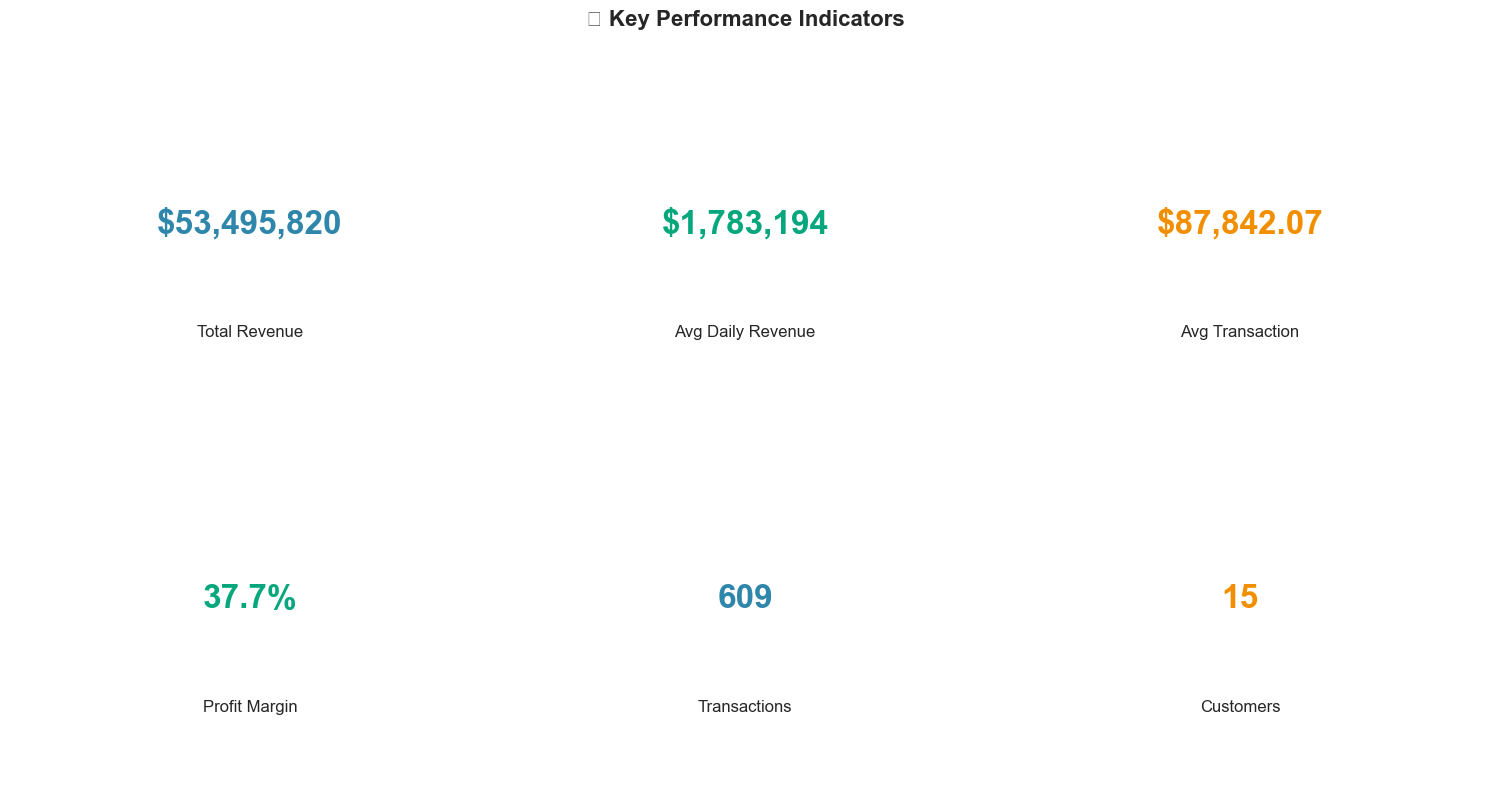

💾 Saved: 01_business_insights_dashboard/01_kpi_dashboard.png


In [14]:
# Calculate KPIs
avg_daily = df_daily['price_total_sum'].mean()
avg_ticket = total_revenue / total_transactions
total_margin = df_daily['margin_total_sum'].sum()
margin_pct = (total_margin / total_revenue) * 100

# KPI Cards
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('📊 Key Performance Indicators', fontsize=16, fontweight='bold')

kpis = [
    (f'${total_revenue:,.0f}', 'Total Revenue', COLORS['primary']),
    (f'${avg_daily:,.0f}', 'Avg Daily Revenue', COLORS['success']),
    (f'${avg_ticket:,.2f}', 'Avg Transaction', COLORS['warning']),
    (f'{margin_pct:.1f}%', 'Profit Margin', COLORS['success']),
    (f'{total_transactions:,}', 'Transactions', COLORS['primary']),
    (f'{unique_customers}', 'Customers', COLORS['warning'])
]

for ax, (value, label, color) in zip(axes.flat, kpis):
    ax.text(0.5, 0.5, value, ha='center', va='center', fontsize=24, fontweight='bold', color=color)
    ax.text(0.5, 0.2, label, ha='center', va='center', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/01_kpi_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"💾 Saved: {OUTPUT_DIR}/01_kpi_dashboard.png")

## 📈 Revenue Trend

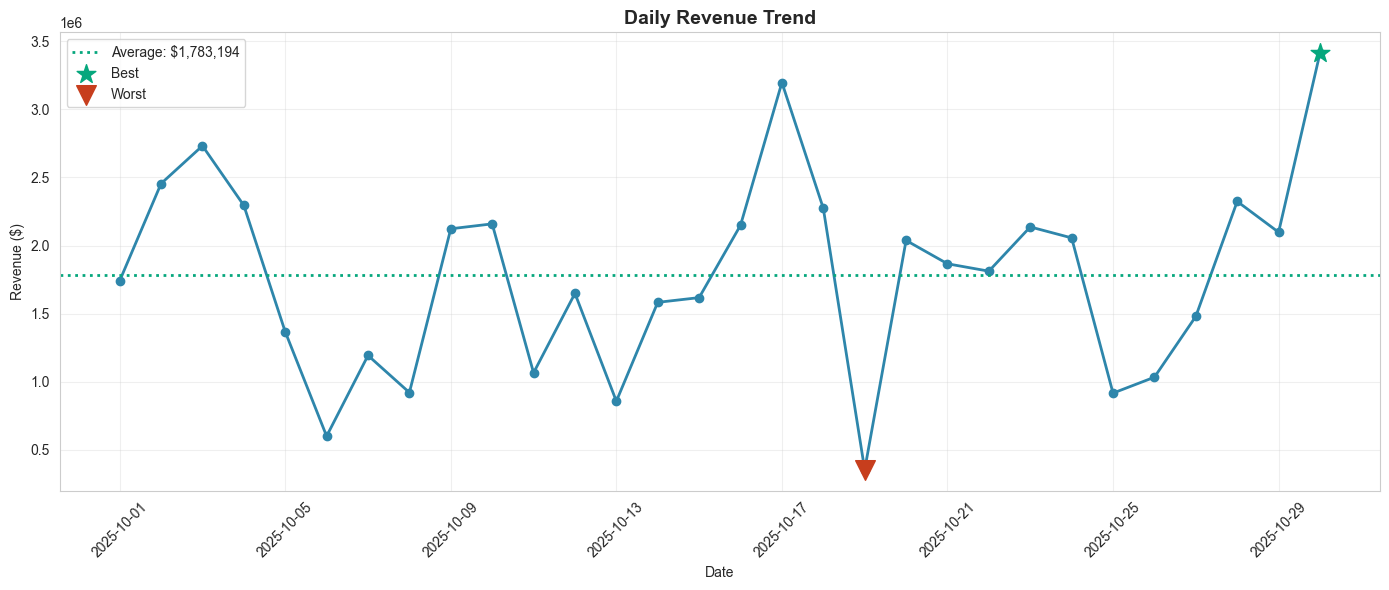


💡 Best: 2025-10-30 - $3,413,690.00
💡 Worst: 2025-10-19 - $352,659.00
💾 Saved: 01_business_insights_dashboard/02_revenue_trend.png


In [15]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df_daily['dt_date'], df_daily['price_total_sum'], marker='o', linewidth=2, color=COLORS['primary'])
ax.axhline(avg_daily, color=COLORS['success'], linestyle=':', linewidth=2, label=f'Average: ${avg_daily:,.0f}')

best_day = df_daily.loc[df_daily['price_total_sum'].idxmax()]
worst_day = df_daily.loc[df_daily['price_total_sum'].idxmin()]

ax.scatter([best_day['dt_date']], [best_day['price_total_sum']], color=COLORS['success'], s=200, zorder=5, label='Best', marker='*')
ax.scatter([worst_day['dt_date']], [worst_day['price_total_sum']], color=COLORS['danger'], s=200, zorder=5, label='Worst', marker='v')

ax.set_title('Daily Revenue Trend', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Revenue ($)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/02_revenue_trend.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n💡 Best: {best_day['dt_date'].strftime('%Y-%m-%d')} - ${best_day['price_total_sum']:,.2f}")
print(f"💡 Worst: {worst_day['dt_date'].strftime('%Y-%m-%d')} - ${worst_day['price_total_sum']:,.2f}")
print(f"💾 Saved: {OUTPUT_DIR}/02_revenue_trend.png")

---
# 2️⃣ Product Intelligence
## 🏆 Top Products

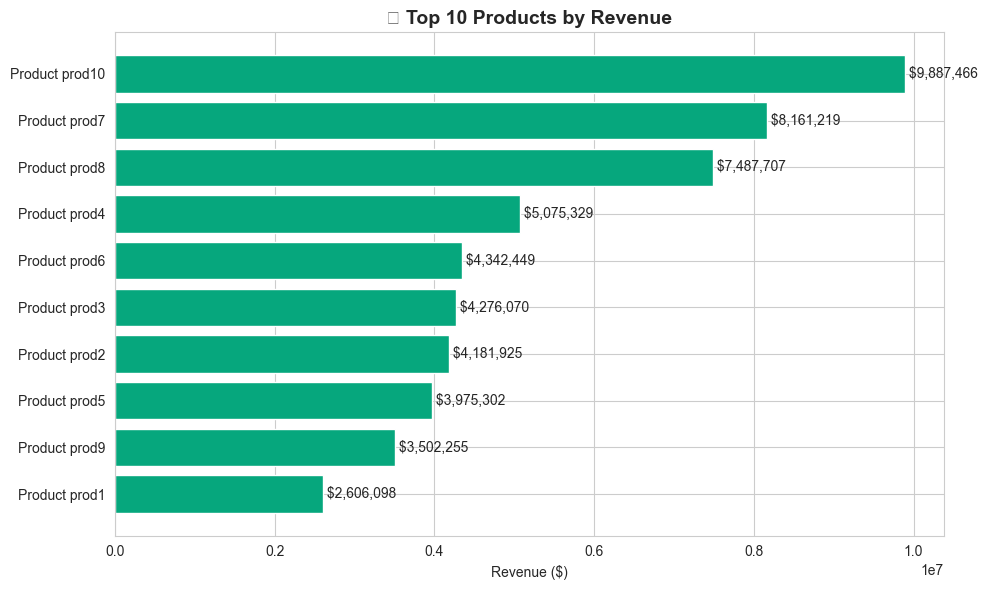


💡 Top 10 products generate 100.0% of revenue
🎯 Ensure these products never go out of stock!
💾 Saved: 01_business_insights_dashboard/03_top_products.png


In [16]:
product_totals = df_products.groupby('in_product_id')['price_total_sum'].sum().sort_values(ascending=False)
top_10 = product_totals.head(10)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(range(len(top_10)), top_10.values, color=COLORS['success'])
ax.set_yticks(range(len(top_10)))
ax.set_yticklabels([f"Product {pid}" for pid in top_10.index])
ax.set_xlabel('Revenue ($)')
ax.set_title('🏆 Top 10 Products by Revenue', fontsize=14, fontweight='bold')
ax.invert_yaxis()

for i, v in enumerate(top_10.values):
    ax.text(v, i, f' ${v:,.0f}', va='center')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/03_top_products.png', dpi=150, bbox_inches='tight')
plt.show()

top_10_pct = (top_10.sum() / product_totals.sum()) * 100
print(f"\n💡 Top 10 products generate {top_10_pct:.1f}% of revenue")
print(f"🎯 Ensure these products never go out of stock!")
print(f"💾 Saved: {OUTPUT_DIR}/03_top_products.png")

---
# 3️⃣ Customer Behavior
## 👥 Purchase Frequency

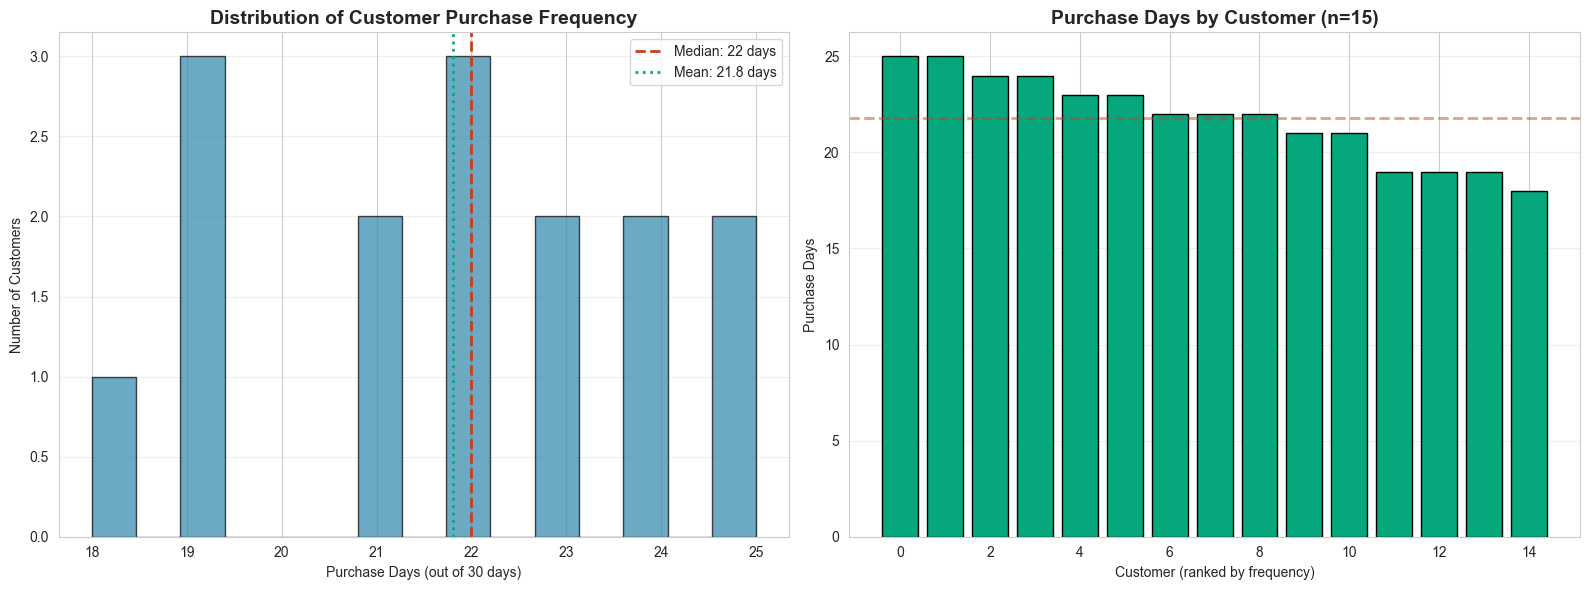


💡 CUSTOMER ENGAGEMENT INSIGHTS:
   Total Customers: 15
   Purchase Days Range: 18 to 25 days (out of 30)
   Average: 21.8 days per customer
   Engagement Rate: 72.7% (days active / total days)

   Highly Active (≥24 days): 4 customers (26.7%)
   Active (20-23 days): 7 customers (46.7%)
   Moderate (<20 days): 4 customers (26.7%)

🎯 INSIGHT: Exceptional engagement! All customers made purchases on 60%+ of available days
💾 Saved: 01_business_insights_dashboard/04_customer_frequency.png


In [17]:
cust_freq = df_customers.groupby('in_customer_id')['dt_date'].count()

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: Histogram of purchase frequency
ax1.hist(cust_freq, bins=15, color=COLORS['primary'], edgecolor='black', alpha=0.7)
ax1.axvline(cust_freq.median(), color=COLORS['danger'], linestyle='--', linewidth=2, 
            label=f'Median: {cust_freq.median():.0f} days')
ax1.axvline(cust_freq.mean(), color=COLORS['success'], linestyle=':', linewidth=2,
            label=f'Mean: {cust_freq.mean():.1f} days')
ax1.set_xlabel('Purchase Days (out of 30 days)')
ax1.set_ylabel('Number of Customers')
ax1.set_title('Distribution of Customer Purchase Frequency', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Right: Bar chart of each customer
cust_freq_sorted = cust_freq.sort_values(ascending=False)
ax2.bar(range(len(cust_freq_sorted)), cust_freq_sorted.values, color=COLORS['success'], edgecolor='black')
ax2.axhline(cust_freq.mean(), color=COLORS['danger'], linestyle='--', linewidth=2, alpha=0.5)
ax2.set_xlabel('Customer (ranked by frequency)')
ax2.set_ylabel('Purchase Days')
ax2.set_title(f'Purchase Days by Customer (n={len(cust_freq)})', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/04_customer_frequency.png', dpi=150, bbox_inches='tight')
plt.show()

# Calculate insights
min_freq = cust_freq.min()
max_freq = cust_freq.max()
avg_freq = cust_freq.mean()

print(f"\n💡 CUSTOMER ENGAGEMENT INSIGHTS:")
print(f"   Total Customers: {len(cust_freq)}")
print(f"   Purchase Days Range: {min_freq} to {max_freq} days (out of 30)")
print(f"   Average: {avg_freq:.1f} days per customer")
print(f"   Engagement Rate: {(avg_freq/30)*100:.1f}% (days active / total days)")

# Categorize
highly_active = (cust_freq >= 24).sum()
active = ((cust_freq >= 20) & (cust_freq < 24)).sum()
moderate = (cust_freq < 20).sum()

print(f"\n   Highly Active (≥24 days): {highly_active} customers ({highly_active/len(cust_freq)*100:.1f}%)")
print(f"   Active (20-23 days): {active} customers ({active/len(cust_freq)*100:.1f}%)")
print(f"   Moderate (<20 days): {moderate} customers ({moderate/len(cust_freq)*100:.1f}%)")

print(f"\n🎯 INSIGHT: Exceptional engagement! All customers made purchases on 60%+ of available days")
print(f"💾 Saved: {OUTPUT_DIR}/04_customer_frequency.png")

---
# 4️⃣ Operational Insights
## ⏰ Peak Hours

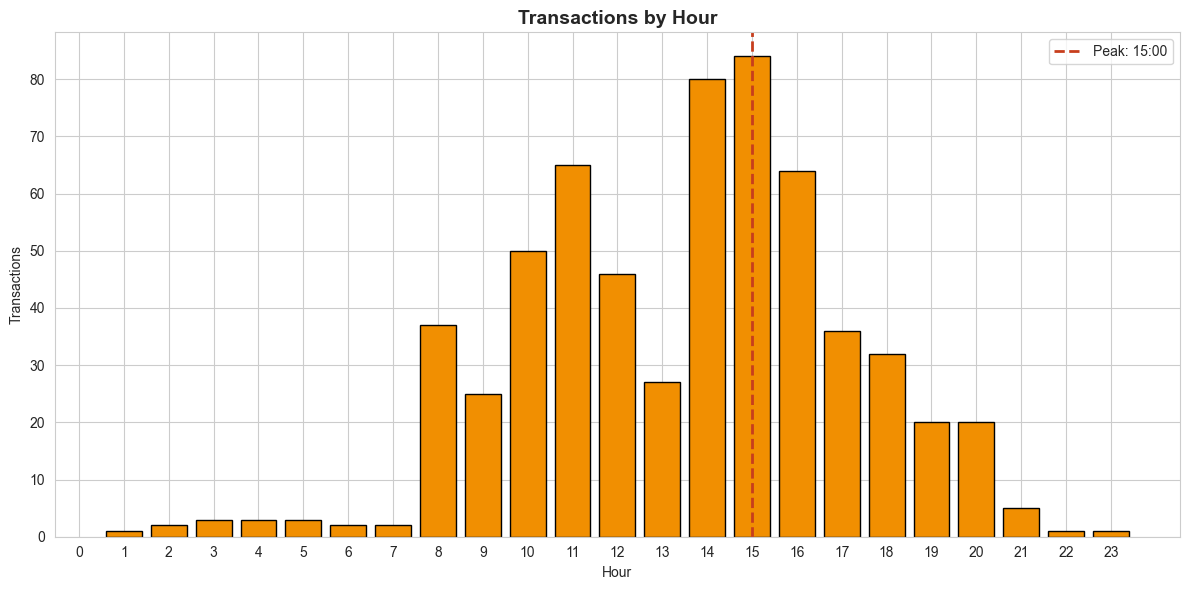


💡 Peak hour: 15:00 with 84 transactions
🎯 Ensure full staff during 15:00-16:00
💾 Saved: 01_business_insights_dashboard/05_hourly_pattern.png


In [ ]:
if 'hour' in df_hourly.columns:
    hourly = df_hourly.groupby('hour')['trans_id_count'].sum()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(hourly.index, hourly.values, color=COLORS['warning'], edgecolor='black')
    peak_hour = hourly.idxmax() # Find the hour with the highest number of transactions
    ax.axvline(peak_hour, color=COLORS['danger'], linestyle='--', linewidth=2, label=f'Peak: {int(peak_hour)}:00')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Transactions')
    ax.set_title('Transactions by Hour', fontsize=14, fontweight='bold')
    ax.legend()
    ax.set_xticks(range(24))
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/05_hourly_pattern.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n💡 Peak hour: {int(peak_hour)}:00 with {hourly.max()} transactions")
    print(f"🎯 Ensure full staff during {int(peak_hour)}:00-{int(peak_hour)+1}:00")
    print(f"💾 Saved: {OUTPUT_DIR}/05_hourly_pattern.png")
else:
    print("⚠️ Hourly data not available")

## 📅 Day of Week

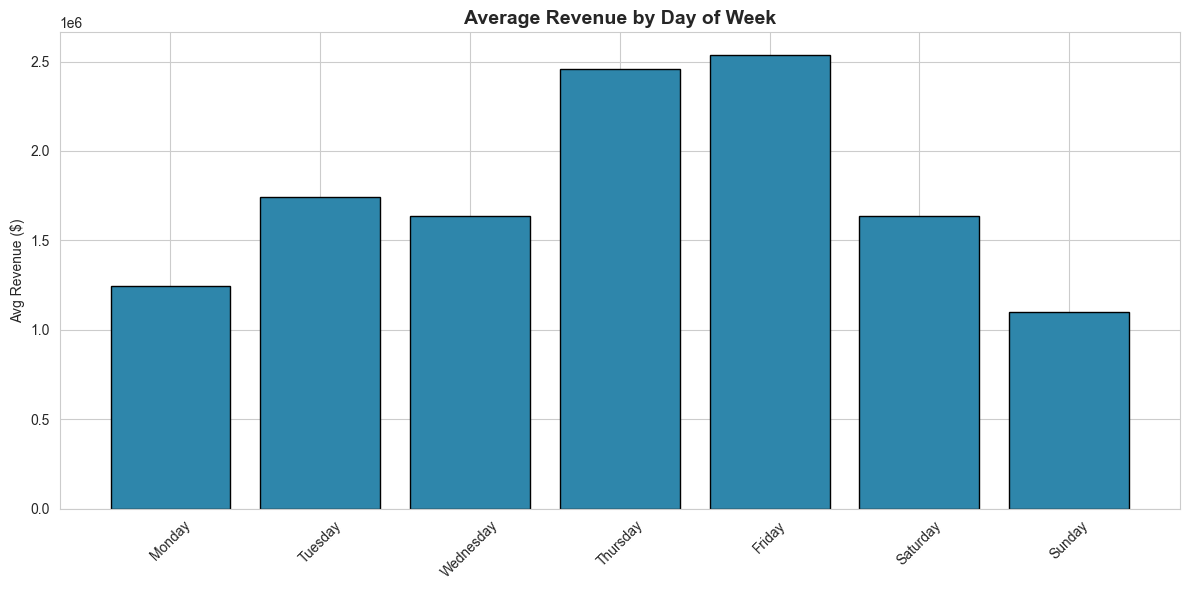


💡 Best: Friday ($2,536,539.50)
💡 Worst: Sunday ($1,099,875.75)
🎯 Run promotions on Sunday to boost traffic
💾 Saved: 01_business_insights_dashboard/06_day_of_week.png


In [19]:
df_daily['day_name'] = df_daily['dt_date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow = df_daily.groupby('day_name')['price_total_sum'].mean().reindex(day_order)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(len(dow)), dow.values, color=COLORS['primary'], edgecolor='black')
ax.set_xticks(range(len(dow)))
ax.set_xticklabels(dow.index, rotation=45)
ax.set_ylabel('Avg Revenue ($)')
ax.set_title('Average Revenue by Day of Week', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/06_day_of_week.png', dpi=150, bbox_inches='tight')
plt.show()

best = dow.idxmax()
worst = dow.idxmin()
print(f"\n💡 Best: {best} (${dow[best]:,.2f})")
print(f"💡 Worst: {worst} (${dow[worst]:,.2f})")
print(f"🎯 Run promotions on {worst} to boost traffic")
print(f"💾 Saved: {OUTPUT_DIR}/06_day_of_week.png")

---
# 📋 Action Plan

In [20]:
print("="*70)
print("🎯 TOP 5 PRIORITY ACTIONS")
print("="*70)

actions = [
    ("Ensure top 10 products never stock out", "HIGH", "Immediate"),
    ("Launch retention program for one-time customers", "HIGH", "1-2 weeks"),
    ("Optimize staffing for peak hours", "MEDIUM", "1-2 weeks"),
    ("Run promotions on slow days", "MEDIUM", "2-4 weeks"),
    ("Analyze margin trends weekly", "MEDIUM", "Ongoing")
]

for i, (action, priority, timeline) in enumerate(actions, 1):
    print(f"\n{i}. {action}")
    print(f"   Priority: {priority} | Timeline: {timeline}")

print("\n" + "="*70)
print("✅ Analysis Complete")
print("="*70)

# Show saved files
print(f"\n📁 All visualizations saved to: {OUTPUT_DIR}/")
import glob
saved_files = sorted(glob.glob(f'{OUTPUT_DIR}/*.png'))
if saved_files:
    print("\nGenerated files:")
    for f in saved_files:
        print(f"  - {f}")
else:
    print("  (No PNG files found)")
    
print(f"\n💡 Tip: You can find all outputs in the '{OUTPUT_DIR}' folder")

🎯 TOP 5 PRIORITY ACTIONS

1. Ensure top 10 products never stock out
   Priority: HIGH | Timeline: Immediate

2. Launch retention program for one-time customers
   Priority: HIGH | Timeline: 1-2 weeks

3. Optimize staffing for peak hours
   Priority: MEDIUM | Timeline: 1-2 weeks

4. Run promotions on slow days
   Priority: MEDIUM | Timeline: 2-4 weeks

5. Analyze margin trends weekly
   Priority: MEDIUM | Timeline: Ongoing

✅ Analysis Complete

📁 All visualizations saved to: 01_business_insights_dashboard/

Generated files:
  - 01_business_insights_dashboard\01_kpi_dashboard.png
  - 01_business_insights_dashboard\02_revenue_trend.png
  - 01_business_insights_dashboard\03_top_products.png
  - 01_business_insights_dashboard\04_customer_frequency.png
  - 01_business_insights_dashboard\05_hourly_pattern.png
  - 01_business_insights_dashboard\06_day_of_week.png

💡 Tip: You can find all outputs in the '01_business_insights_dashboard' folder
